# FordGoBike
## by Mayar Mohsen

## Preliminary Wrangling

> *This data set includes information about individual rides made 
in a bike-sharing system covering the greater San Francisco 
Bay area*

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.shape

(183412, 16)

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# separating start_time and end_time columns to date and time
df['start_date'] = df['start_time'].str.split(' ', expand=True)[0]
df['start_time'] = df['start_time'].str.split(' ', expand=True)[1]
df['end_date'] = df['end_time'].str.split(' ', expand=True)[0]
df['end_time'] = df['end_time'].str.split(' ', expand=True)[1]

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,52185,17:32:10.1450,08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01
1,42521,18:53:21.7890,06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,2019-03-01
2,61854,12:13:13.2180,05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01
3,36490,17:54:26.0100,04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01
4,1585,23:54:18.5490,00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
#checking nulls
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_date                    0
end_date                      0
dtype: int64

In [8]:
#droping nulls
df.dropna(inplace=True)
df.shape

(174952, 18)

In [9]:
#check duplicates
df.duplicated().any()

False

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,52185,17:32:10.1450,08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01
2,61854,12:13:13.2180,05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01
3,36490,17:54:26.0100,04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01
4,1585,23:54:18.5490,00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01
5,1793,23:49:58.6320,00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01


In [11]:
# save edited dataframe to a new csv file
df.to_csv('fordgobike.csv', index=True)

### What is the structure of your dataset?

> - duration in seconds <br>
> - start time and end time <br>
> - start station name and end station name <br>
> - start station latitude and end station latitude <br>
> - start station longitude and end station longitude <br>
> - bike id <br>
> - user type "customer or subscriber" <br>
> - member birth year <br>
> - member gender "male or female" <br>
### What are the main features of interest in your dataset?
> - user type "customer or subscriber" <br>
> - member gender "male or female" <br>
### What features in the dataset do you think will help support your investigation into your features of interest?
> - duration in seconds <br>
> - member birth year 

## Univariate Exploration


## Duration in seconds

In [12]:
min_duration = np.log10(df['duration_sec'].min())
max_duration = np.log10(df['duration_sec'].max())
min_duration, max_duration

(1.7853298350107671, 4.9271033387316665)

Text(0.5, 1.0, 'plot of Duaration in Log scale')

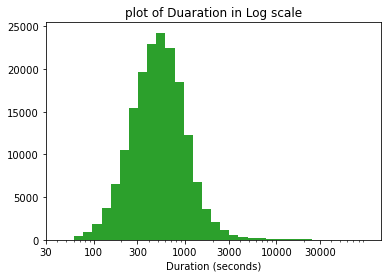

In [13]:
base_color=sb.color_palette()[2]
bins = 10**np.arange(min_duration, max_duration+0.1, 0.1)
plt.hist(data=df, x='duration_sec', bins=bins, color=base_color)

plt.xscale('log')
ticks = [30,100,300,1000,3000,10000,30000]
label = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, label)

plt.xlabel('Duration (seconds)')
plt.title ('plot of Duaration in Log scale')

In [14]:
np.log10(df['duration_sec']).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

### Notes:<br>  
<span style="color:green">**- most of the time spent is between 300 and 1000** <br></span>
<span style="color:green">**- The distribution is unimodal** <br></span>
<span style="color:green">**- The distribution is right skewed** <br></span>

## Member birth year

In [15]:
min_year = df['member_birth_year'].min()
max_year = df['member_birth_year'].max()
min_year, max_year

(1878.0, 2001.0)

Text(0.5, 1.0, 'plot for member birth year')

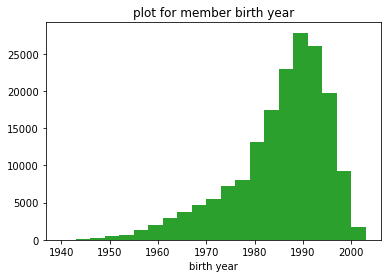

In [16]:
bins= np.arange(1940, max_year+3, 3)
plt.hist(data=df, x='member_birth_year', bins = bins, color=base_color)
plt.xlabel('birth year')
plt.title('plot for member birth year')

In [17]:
df['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Notes:
<span style="color:green">**- The members birth year is starting from 1878 , but to take a closer look on the data we will start from 1940** <br></span>
<span style="color:green">**- we can see from the plot that the largest number of members were born in 1990** </span>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- <span style="color:green">In the Duration plot, I used a log scale.<br></span>
>- <span style="color:green">In the member birth year plot,Although the member birth year started from 1878, The plot started from 1940 to avoid outliers. </span>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- <span style="color:green">No, there wasn't unusual distributions<br></span>
>- <span style="color:green">No, There wasn't any operations performed on the data</span>

## Bivariate Exploration


### Member birth year VS.Duration

<AxesSubplot:xlabel='member_birth_year', ylabel='duration_sec'>

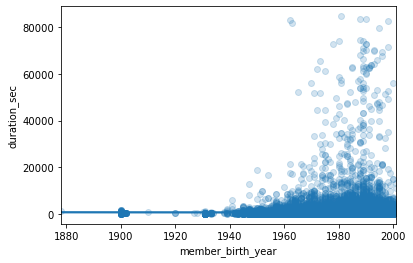

In [18]:
base_color = sb.color_palette()[0]
sb.regplot(data=df, x='member_birth_year', y='duration_sec', color=base_color, scatter_kws={'alpha':1/5} )

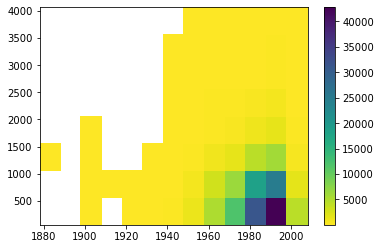

In [19]:
bins_x= np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+10, 10)
bins_y= np.arange(df['duration_sec'].min(), 4000+500, 500)
plt.hist2d(data=df, x='member_birth_year', y='duration_sec',cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()

### Notes:
- <span style="color:blue"> we can't get any useful information from the scatter plot shown above  <br></span>
- <span style="color:blue"> From the heat map we found that most members born from 1980 till 2000 has the least duration from 0 to 1500 seconds <br></span>

### Member gender VS. Member birth year

In [20]:
# function to convert data types to category
def category (column, categories):
    classes = categories
    typ = pd.api.types.CategoricalDtype(ordered=True, categories=classes)
    df[column] = df[column].astype(typ)
    return df

In [21]:
category('member_gender', ['Male', 'Female', 'Other'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,52185,17:32:10.1450,08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01
2,61854,12:13:13.2180,05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01
3,36490,17:54:26.0100,04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01
4,1585,23:54:18.5490,00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01
5,1793,23:49:58.6320,00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,00:04:49.7240,00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,2019-02-01,2019-02-01
183408,313,00:05:34.7440,00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,2019-02-01,2019-02-01
183409,141,00:06:05.5490,00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,2019-02-01,2019-02-01
183410,139,00:05:34.3600,00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,2019-02-01,2019-02-01


(1940.0, 2010.3233871389662)

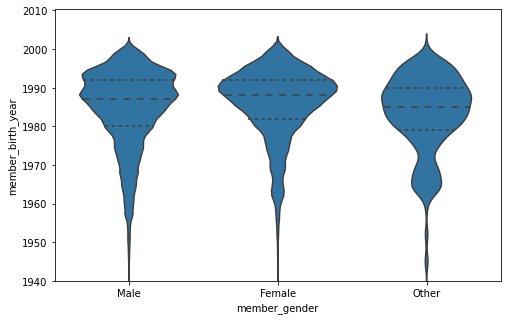

In [22]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='member_gender', y='member_birth_year', inner ='quartile' ,  color = base_color)
plt.ylim(1940)

In [23]:
df.groupby('member_gender').describe()['member_birth_year']

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Male,130500.0,1984.546383,10.345189,1900.0,1980.0,1987.0,1992.0,2001.0
Female,40805.0,1985.776302,9.284004,1878.0,1982.0,1988.0,1992.0,2001.0
Other,3647.0,1983.102002,10.098447,1910.0,1979.0,1985.0,1990.0,2000.0


### Member gender VS. Duration

<AxesSubplot:xlabel='member_gender', ylabel='duration_sec'>

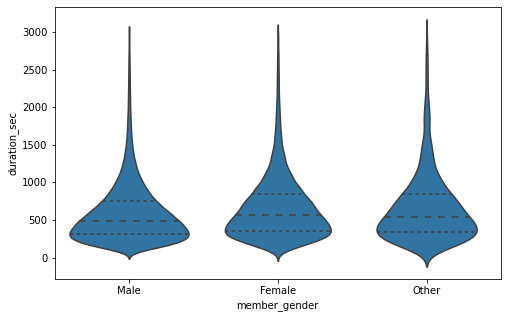

In [24]:
plt.figure(figsize=[8,5])
df_edited = df.query('duration_sec < 3000')
sb.violinplot(data=df_edited, x='member_gender', y='duration_sec', inner ='quartile' ,  color = base_color)


In [25]:
df.groupby('member_gender').describe()['duration_sec']

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Male,130500.0,672.394851,1504.794560,61.0,311.0,493.0,761.0,84548.0
Female,40805.0,778.872761,1787.003612,61.0,361.0,567.0,864.0,83195.0
Other,3647.0,997.328489,3526.245996,63.0,344.0,556.0,874.5,82512.0


### User type VS. Member birth year

In [26]:
category('user_type', ['Customer', 'Subscriber'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,52185,17:32:10.1450,08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01
2,61854,12:13:13.2180,05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01
3,36490,17:54:26.0100,04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01
4,1585,23:54:18.5490,00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01
5,1793,23:49:58.6320,00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,00:04:49.7240,00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,2019-02-01,2019-02-01
183408,313,00:05:34.7440,00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,2019-02-01,2019-02-01
183409,141,00:06:05.5490,00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,2019-02-01,2019-02-01
183410,139,00:05:34.3600,00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,2019-02-01,2019-02-01


(1940.0, 2010.1399821223822)

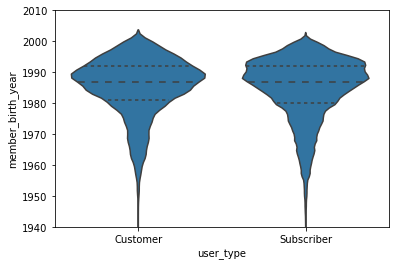

In [27]:
sb.violinplot(data=df, x='user_type', y='member_birth_year', color=base_color, inner='quartile')
plt.ylim(1940)

In [28]:
df.groupby('user_type').describe()['member_birth_year']

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,16566.0,1985.351382,9.486138,1878.0,1981.0,1987.0,1992.0,2001.0
Subscriber,158386.0,1984.745792,10.180949,1900.0,1980.0,1987.0,1992.0,2001.0


### Notes:
- <span style="color:blue"> Both the customers and subscribers are the same <br></span>

### User type VS. Duration

<AxesSubplot:xlabel='user_type', ylabel='duration_sec'>

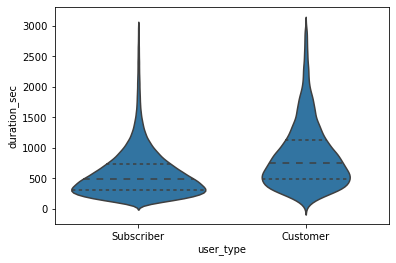

In [29]:
sb.violinplot(data=df_edited, x='user_type', y='duration_sec', color=base_color, inner='quartile')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Males have the shortest duration trips <br>
> - Females have a long duration trips "longer than males but shorter than others"<br> 
> - Others have the longest duration trips<br> 

> - Older males have the higher range in participating <br>
> - yonger females have the higher range in participating <br>
> - Others are younger than males and older than females <br>

> - There wasn't a significant difference between customers and subiscribers birth year
> - subiscribers have a shortest duration trips than the customers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - No, There wasn't anything interesting 

## Multivariate Exploration


## Member birth year VS. Duration VS. Member gender

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


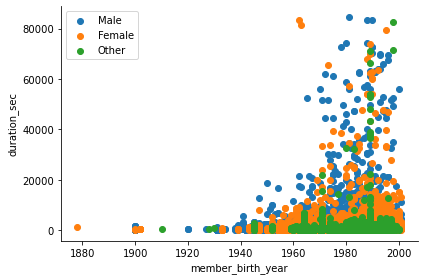

In [30]:
g = sb.FacetGrid(data=df, hue='member_gender',size=4, aspect=1.5)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
plt.legend()

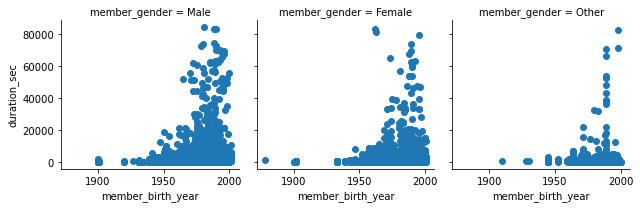

In [31]:
g = sb.FacetGrid(data=df, col='member_gender')
g.map(plt.scatter, 'member_birth_year', 'duration_sec')

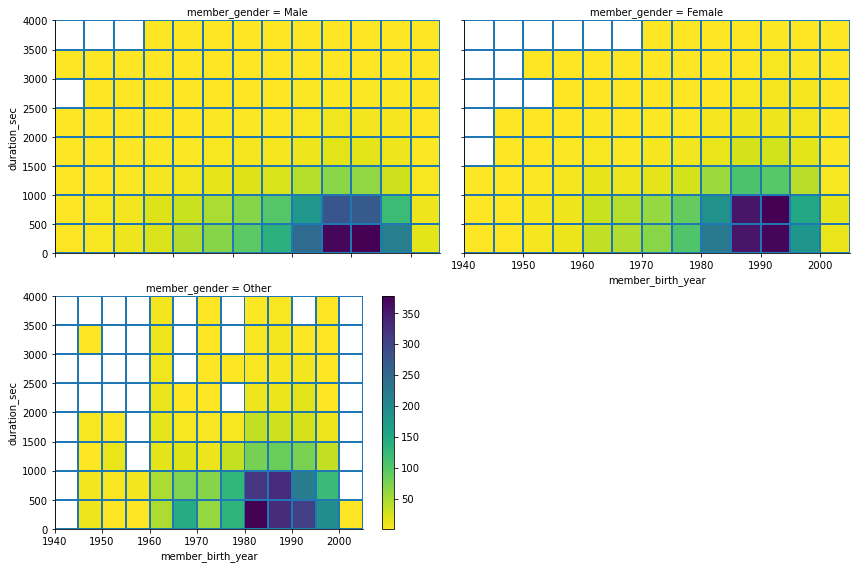

In [32]:
bins_x = np.arange(1940, df['member_birth_year'].max()+5,5)
bins_y = np.arange(0, 4000+500,500)

g = sb.FacetGrid(data=df, col='member_gender', size=4, aspect=1.5, col_wrap=2)
g.map(plt.hist2d, 'member_birth_year', 'duration_sec',bins=[bins_x,bins_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()

- <span style="color:red">**As shown above, I tried using color palets and scatter plots but they weren't useful like using the heat maps**</span>

## Member birth year VS. Duration VS. User type

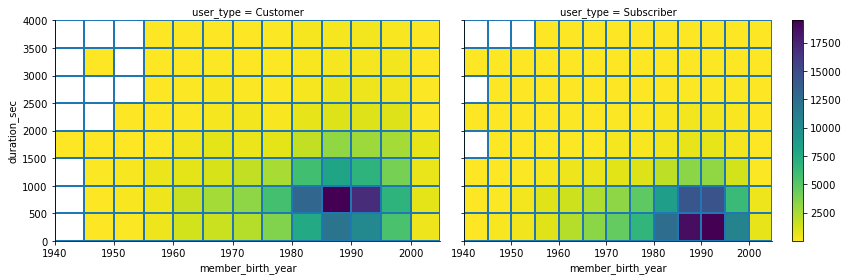

In [33]:
bins_x = np.arange(1940, df['member_birth_year'].max()+5,5)
bins_y = np.arange(0, 4000+500,500)

g = sb.FacetGrid(data=df, col='user_type', size=4, aspect=1.5)
g.map(plt.hist2d, 'member_birth_year', 'duration_sec',bins=[bins_x,bins_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()

## Member gender VS. User type VS. Duration

<AxesSubplot:xlabel='member_gender', ylabel='user_type'>

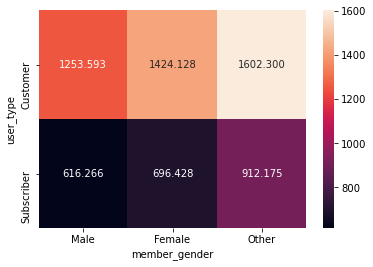

In [34]:
cat_mean = df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_mean = cat_mean.reset_index(name='duration_av')
cat_mean = cat_mean.pivot(index = 'user_type', columns='member_gender', values='duration_av')
sb.heatmap(cat_mean, annot = True, fmt='.3f')

## Member gender VS. User type VS. member birth year

<AxesSubplot:xlabel='member_gender', ylabel='user_type'>

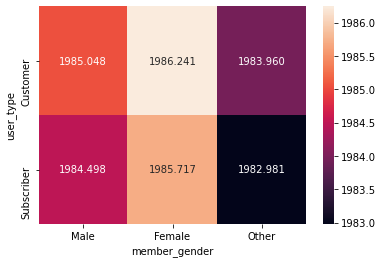

In [35]:
cat_mean = df.groupby(['member_gender', 'user_type']).mean()['member_birth_year']
cat_mean = cat_mean.reset_index(name='duration_av')
cat_mean = cat_mean.pivot(index = 'user_type', columns='member_gender', values='duration_av')
sb.heatmap(cat_mean, annot = True, fmt='.3f')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> <span style="color:red">**From the previous plots:** <br></span>
> - Males born from 1980 to 2000 mostly have trips from 0 to 500 seconds
> - Females born from 1980 to 2000 mostly have trips from 0 to 1000 seconds
> - Others born from 1975 to 2000 mostly have trips from 0 to 1000 seconds

> - Customers born from 1980 to 2000 mostly have trips from 500 to 1000 seconds
> - subscribers born from 1980 to 2000 mostly have trips from 0 to 500 seconds
 

### Were there any interesting or surprising interactions between features?

> No there wasn't